In [ ]:
 # フォントを全て読み込み
import matplotlib.pyplot as plt
import japanize_matplotlib

fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = "MS Gothic"

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [3]:
states=['戦後復興期','高度経済成長期','安定成長期','バブル期','調整期',
        'アベノミクス']
starts=["1949/5/16","1954/12/1",'1972/1/1',"1986/12/1","1993/11/1",
       "2012/11/1"]
ends=["1954/11/30",'1972/12/31',"1986/11/30","1993/10/31",
       "2012/10/31","2022/12/31"]
cycles=['1,2','3,4,5,6','7,8,9,10','11','12-15','16']
factors=['循環期','始点','終点']
economies=pd.DataFrame(np.array([cycles,starts,ends]).T,
                       index=states,columns=factors)
print('表5.1: 景気循環期(内閣府)')
economies

表5.1: 景気循環期(内閣府)


,循環期,始点,終点
戦後復興期,"1,2",1949/5/16,1954/11/30
高度経済成長期,"3,4,5,6",1954/12/1,1972/12/31
安定成長期,"7,8,9,10",1972/1/1,1986/11/30
バブル期,11,1986/12/1,1993/10/31
調整期,12-15,1993/11/1,2012/10/31
アベノミクス,16,2012/11/1,2022/12/31


In [4]:
n225 = web.DataReader("NIKKEI225", 'fred',"1949/5/16",'2022/12/31').NIKKEI225
ave=[((n225[starts[i]:ends[i]].pct_change().mean()+1)**240-1)*100 
     for i in range(len(ends))]
economies['N225年変化率％']=np.round(ave,2)
print('表5.2: 景気循環期(内閣府)+日経平均株価')
economies

表5.2: 景気循環期(内閣府)+日経平均株価


,循環期,始点,終点,N225年変化率％
戦後復興期,"1,2",1949/5/16,1954/11/30,13.54
高度経済成長期,"3,4,5,6",1954/12/1,1972/12/31,16.28
安定成長期,"7,8,9,10",1972/1/1,1986/11/30,13.27
バブル期,11,1986/12/1,1993/10/31,3.41
調整期,12-15,1993/11/1,2012/10/31,-1.13
アベノミクス,16,2012/11/1,2022/12/31,12.38


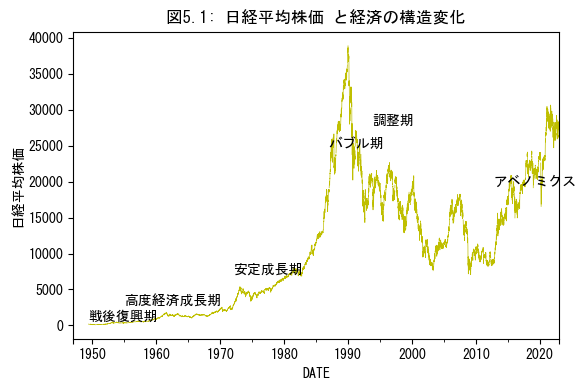

In [5]:
fig=plt.figure(figsize=(6,4))
g=fig.add_subplot(1,1,1)
n225.plot(ax=g,style='y-',linewidth=0.5)
plt.ylabel('日経平均株価')
for i,(date, label) in enumerate(zip(starts,states)):
    g.annotate(label,xy=(date, n225.asof(date)),
        xytext=(date,n225.asof(date)+2000+i*2000),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2022/12/31'])
plt.title("図5.1: 日経平均株価 と経済の構造変化")
plt.tight_layout()  
plt.show()

In [6]:
償還価格=103
買付価格=100
n=1000000
(np.log(償還価格/買付価格)/n+1)**n

1.0299999996047993

In [7]:
vol=[np.log(n225[starts[i]:ends[i]]).diff().std()*np.sqrt(240)*100 
     for i in range(len(ends))]
economies['ボラティリティ％']=np.round(vol,2)
print('表5.3: 景気循環期(内閣府)+日経平均株価')
economies

表5.3: 景気循環期(内閣府)+日経平均株価


,循環期,始点,終点,N225年変化率％,ボラティリティ％
戦後復興期,"1,2",1949/5/16,1954/11/30,13.54,22.53
高度経済成長期,"3,4,5,6",1954/12/1,1972/12/31,16.28,14.24
安定成長期,"7,8,9,10",1972/1/1,1986/11/30,13.27,12.38
バブル期,11,1986/12/1,1993/10/31,3.41,22.36
調整期,12-15,1993/11/1,2012/10/31,-1.13,23.02
アベノミクス,16,2012/11/1,2022/12/31,12.38,20.26


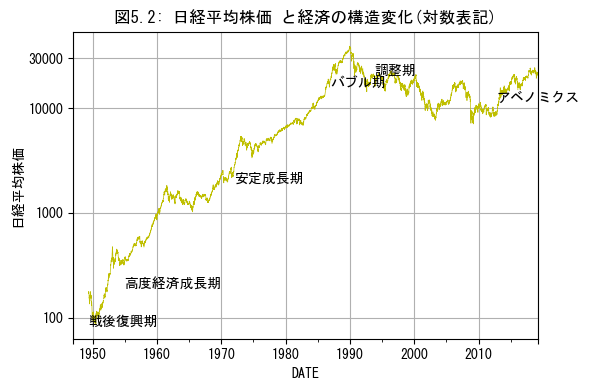

In [8]:
fig=plt.figure(figsize=(6,4))
g=fig.add_subplot(1,1,1)
lnn225=np.log(n225)             
lnn225.plot(ax=g,style='y-',linewidth=0.5)

for i,(date, label) in enumerate(zip(starts,states)):
    g.annotate(label,xy=(date, lnn225.asof(date)),
        xytext=(date,lnn225.asof(date)-0.5+i*0.2),
        horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])
plt.ylabel('日経平均株価')
#plt.yscale("log")
plt.yticks([np.log(100),np.log(1000),np.log(10000),np.log(30000)],
           [100,1000,10000,30000])
plt.grid()
plt.title("図5.2: 日経平均株価 と経済の構造変化(対数表記)")
plt.tight_layout()
plt.show()

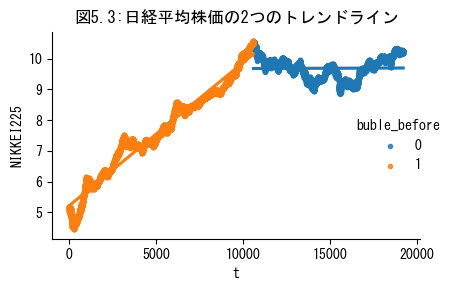

In [9]:
lnn225=np.log(pd.DataFrame(n225,index=n225.index,columns=['NIKKEI225']))
lnn225["t"]=range(len(lnn225))
lnn225["buble_before"]=0
lnn225.loc[:"1989/12/31","buble_before"]=1

#sns.set_theme(style="darkgrid")
sns.lmplot(x='t',y='NIKKEI225',data=lnn225,hue="buble_before",markers=".",
           ci=99,height=3, aspect=1.2)
plt.title('図5.3:日経平均株価の2つのトレンドライン')
plt.tight_layout()  
#plt.savefig("0503.jpeg",dpi=600)
plt.show()

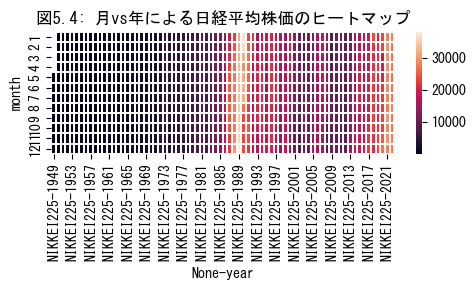

In [10]:
n225=pd.DataFrame(n225,index=n225.index,columns=['NIKKEI225'])
n225['year']=n225.index.year
n225['month']=n225.index.month

a=n225.pivot_table(index=["month"],columns="year",values=["NIKKEI225"])

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(a, annot=False, fmt="d", linewidths=.1,ax=ax)
plt.title('図5.4: 月vs年による日経平均株価のヒートマップ')
plt.tight_layout()  
plt.show()

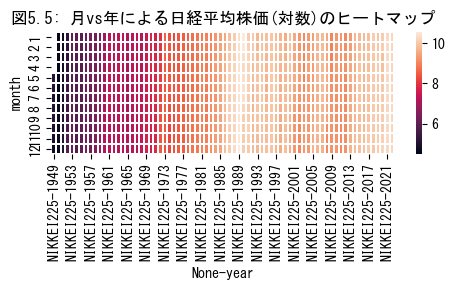

In [11]:
lnn225['year']=lnn225.index.year
lnn225['month']=lnn225.index.month

a=lnn225.pivot_table(index=["month"],columns="year",values=["NIKKEI225"])

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(a, annot=False, fmt="d", linewidths=.1,ax=ax)
plt.title('図5.5: 月vs年による日経平均株価(対数)のヒートマップ')
plt.tight_layout()  
plt.show()

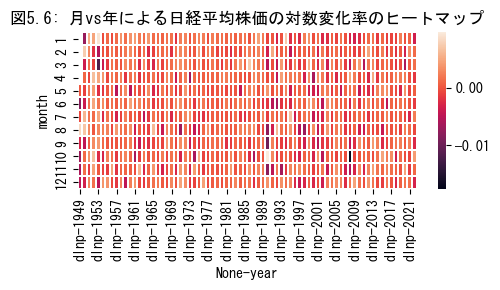

In [12]:
n225["dlnp"]=lnn225.NIKKEI225.diff().fillna(0)

b=n225.pivot_table(index=["month"],columns="year",values=["dlnp"])

fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(b, annot=False, fmt="d", linewidths=.1,ax=ax)
plt.title('図5.6: 月vs年による日経平均株価の対数変化率のヒートマップ')
plt.tight_layout() 
#plt.savefig("0506.jpeg",dpi=600)
plt.show()

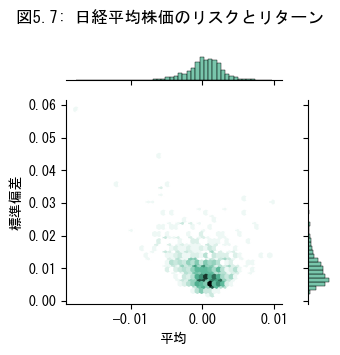

In [13]:
x=n225.resample('M').dlnp.mean()
y=n225.resample('M').dlnp.std()
ax=sns.jointplot(x=x, y=y, kind="hex", color="#4CB391",height=3.5)
plt.xlabel('平均')
plt.ylabel('標準偏差')
ax.fig.suptitle('図5.7: 日経平均株価のリスクとリターン',y=1)
plt.tight_layout()
#plt.savefig('0507.jpeg',dpi=600)
plt.show()

In [14]:
def intraday_vs_overnight_from_csv(name,title):
    analysis = pd.read_csv(name+".csv",index_col=0,parse_dates=True).dropna()
    c0=analysis.Close.iloc[0]    
    o=analysis.Open
    c=analysis.Close
    c0=analysis.Close.shift()
    co=c-o
    oc0=(o-c0).fillna(0)
    analysis['intraday']=co
    analysis['overnight']=oc0
    plt.figure(figsize=(5,3))
    (analysis.Close-analysis.Close.iloc[0]).plot(label='終値',linewidth=1)
    analysis.intraday.cumsum().plot(label="日中",linestyle=":")
    analysis.overnight.cumsum().plot(label="夜間",linestyle='--',linewidth=1)
    plt.legend()
    plt.ylabel('収益・価格')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.tight_layout()  
    #plt.savefig(name+".jpeg",dpi=600)
    plt.show()

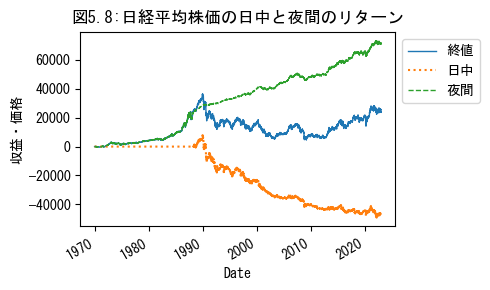

In [15]:
intraday_vs_overnight_from_csv('^N225'\
                               ,'図5.8:日経平均株価の日中と夜間のリターン')

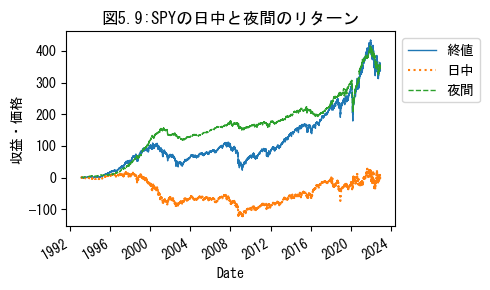

In [16]:
intraday_vs_overnight_from_csv('SPY','図5.9:SPYの日中と夜間のリターン')

　また、その他の参考としてダウ工業株価指数連動ETFのDIAとナスダック100 連動ETFのQQQの結果を載せた。

DIAの場合


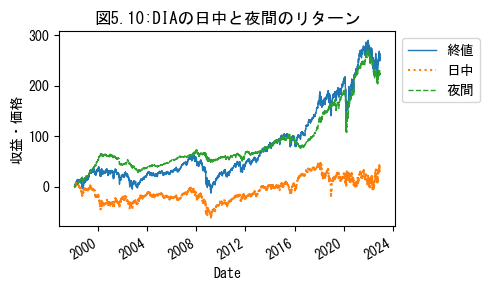

In [17]:
intraday_vs_overnight_from_csv('DIA','図5.10:DIAの日中と夜間のリターン')

QQQの場合

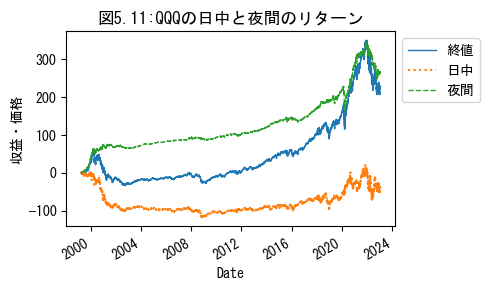

In [18]:
intraday_vs_overnight_from_csv('QQQ','図5.11:QQQの日中と夜間のリターン')